references: 
- https://towardsdatascience.com/kriging-the-french-temperatures-f0389ca908dd
- https://youtu.be/dcDQCarn6qg
- https://medium.com/analytics-vidhya/creating-contour-lines-on-folium-map-with-python-b7994e67924b


read data and convert types

In [1]:
import pandas as pd
import datetime

In [2]:
station_data = pd.read_csv("station_data.csv", index_col = 0, dtype = {"device_id":"string", "name":"string", "latitude":"float64", "longitude":"float64"})
rain_data = pd.read_csv("rain_data_full.csv",  index_col = 0)

In [3]:
station_data

,device_id,name,latitude,longitude
0,S77,Alexandra Road,1.29370,103.81250
1,S109,Ang Mo Kio Avenue 5,1.37640,103.84920
2,S64,Bukit Panjang Road,1.38240,103.76030
3,S90,Bukit Timah Road,1.31910,103.81910
4,S61,Chai Chee Street,1.32300,103.92170
...,...,...,...,...
76,S07,Lornie Road,1.34150,103.83340
77,S29,Pasir Ris Drive 12,1.38700,103.93500
78,S92,South Buona Vista Road,1.28410,103.78860
79,S46,Sime Road,1.34160,103.81060


In [4]:
rain_data

,date,time,station,value
0,2023-02-03,00:05:00,S77,0.0
1,2023-02-03,00:10:00,S77,0.0
2,2023-02-03,00:15:00,S77,0.0
3,2023-02-03,00:20:00,S77,0.0
4,2023-02-03,00:25:00,S77,0.0
...,...,...,...,...
25727377,2020-09-09,23:35:00,S105,NaN
25727378,2020-09-09,23:40:00,S105,NaN
25727379,2020-09-09,23:45:00,S105,NaN
25727380,2020-09-09,23:50:00,S105,NaN


In [5]:
rain_data["date_time"] = pd.to_datetime(rain_data["date"].astype(str) + " " + rain_data["time"].astype(str), 
                                        format = "%Y-%m-%d %H:%M:%S")

rain_data["date"] = pd.to_datetime(rain_data["date"], format = "%Y-%m-%d")

rain_data

,date,time,station,value,date_time
0,2023-02-03,00:05:00,S77,0.0,2023-02-03 00:05:00
1,2023-02-03,00:10:00,S77,0.0,2023-02-03 00:10:00
2,2023-02-03,00:15:00,S77,0.0,2023-02-03 00:15:00
3,2023-02-03,00:20:00,S77,0.0,2023-02-03 00:20:00
4,2023-02-03,00:25:00,S77,0.0,2023-02-03 00:25:00
...,...,...,...,...,...
25727377,2020-09-09,23:35:00,S105,NaN,2020-09-09 23:35:00
25727378,2020-09-09,23:40:00,S105,NaN,2020-09-09 23:40:00
25727379,2020-09-09,23:45:00,S105,NaN,2020-09-09 23:45:00
25727380,2020-09-09,23:50:00,S105,NaN,2020-09-09 23:50:00


create map

In [6]:
import folium
import matplotlib.pyplot as plt
import numpy as np

In [31]:
mapf = folium.Map(location = [1.352083, 103.819839], zoom_start = 11) 

for idx, row_data in station_data.iterrows():
    device_id, name, latitude, longitude = row_data
    marker = folium.Marker(location = (latitude, longitude),
                           tooltip = f"device id: {device_id}, name: {name}")
    marker.add_to(mapf)

mapf

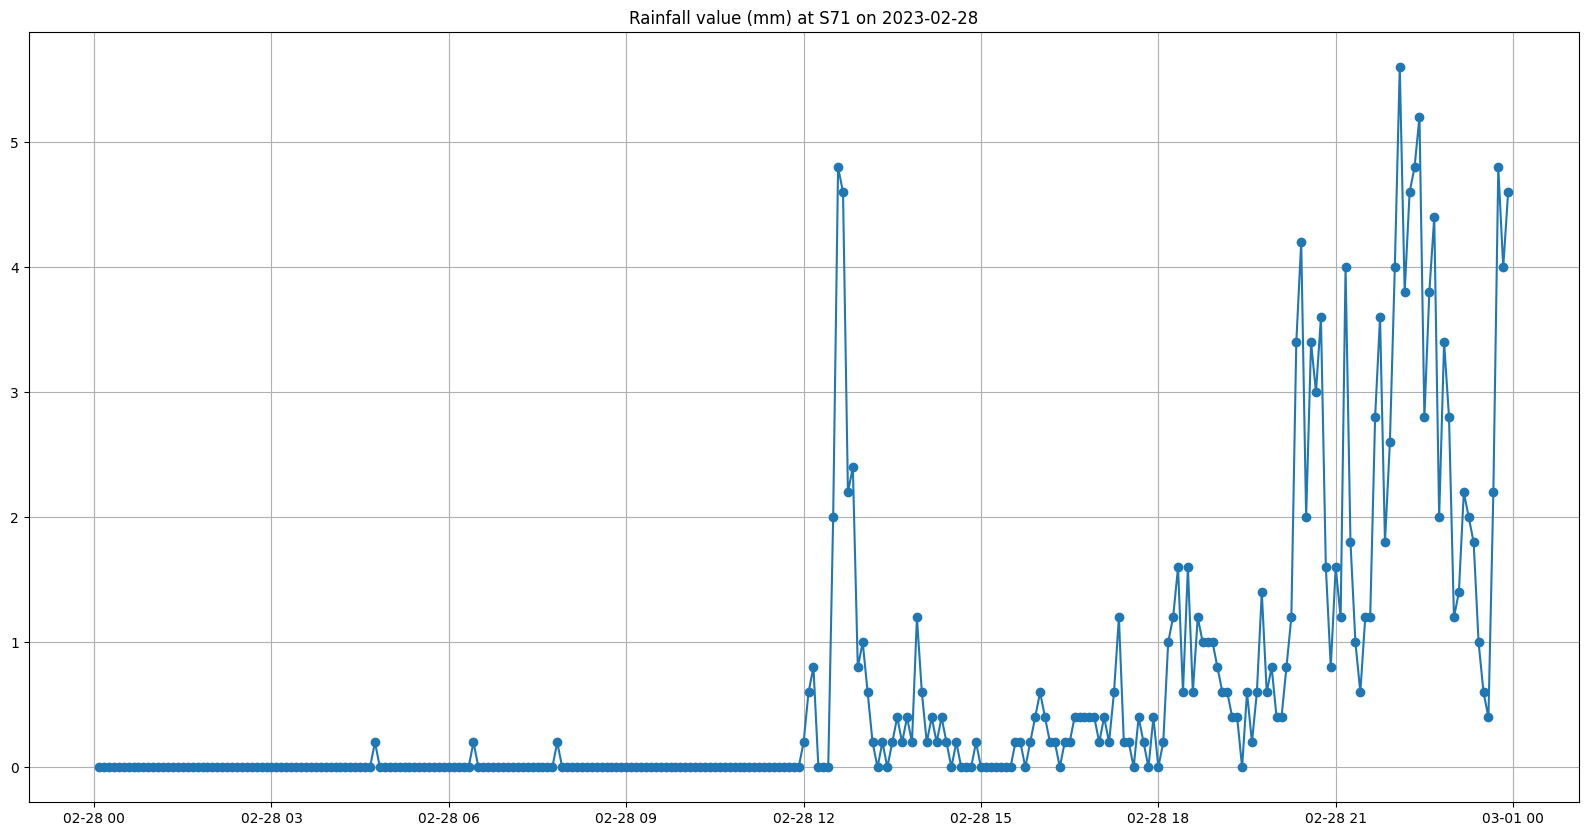

In [8]:
target_date = "2023-02-28" # YYYY-MM-DD
target_station = "S71" # kent ridge
target_df = rain_data[(rain_data["date"] == target_date) & (rain_data["station"] == target_station)]

target_df

plt.figure(figsize = (20,10))
plt.plot(target_df["date_time"], target_df["value"], "-o")
plt.title(f"Rainfall value (mm) at {target_station} on {target_date}")
plt.grid()

In [9]:
target_time = "22:00:00"

target_df_2802 = rain_data[(rain_data["date"] == target_date) & (rain_data["time"] == target_time)]

target_df_2802.dropna(inplace = True) # remove rows where stations were inactive

# join dataframes to include location values
target_df_2802_loc = target_df_2802.merge(station_data, left_on = "station", right_on = "device_id")

C:\Users\natas\AppData\Local\Temp\ipykernel_3096\2632780655.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  target_df_2802.dropna(inplace = True) # remove rows where stations were inactive


In [10]:
target_df_2802_loc

,date,time,station,value,date_time,device_id,name,latitude,longitude
0,2023-02-28,22:00:00,S77,4.2,2023-02-28 22:00:00,S77,Alexandra Road,1.29370,103.81250
1,2023-02-28,22:00:00,S109,0.6,2023-02-28 22:00:00,S109,Ang Mo Kio Avenue 5,1.37640,103.84920
2,2023-02-28,22:00:00,S64,3.4,2023-02-28 22:00:00,S64,Bukit Panjang Road,1.38240,103.76030
3,2023-02-28,22:00:00,S90,2.8,2023-02-28 22:00:00,S90,Bukit Timah Road,1.31910,103.81910
4,2023-02-28,22:00:00,S61,1.6,2023-02-28 22:00:00,S61,Chai Chee Street,1.32300,103.92170
...,...,...,...,...,...,...,...,...,...
63,2023-02-28,22:00:00,S116,4.0,2023-02-28 22:00:00,S116,West Coast Highway,1.28100,103.75400
64,2023-02-28,22:00:00,S104,6.0,2023-02-28 22:00:00,S104,Woodlands Avenue 9,1.44387,103.78538
65,2023-02-28,22:00:00,S100,4.2,2023-02-28 22:00:00,S100,Woodlands Road,1.41720,103.74855
66,2023-02-28,22:00:00,S117,1.0,2023-02-28 22:00:00,S117,Banyan Road,1.25600,103.67900


kriging

In [16]:
import pykrige
import pykrige.kriging_tools as kt

In [17]:
print(target_df_2802_loc["latitude"].min())
print(target_df_2802_loc["latitude"].max())
print(target_df_2802_loc["longitude"].min())
print(target_df_2802_loc["longitude"].max())

1.25
1.44387
103.61843
104.00317


Text(0.5, 1.0, 'measured vals')

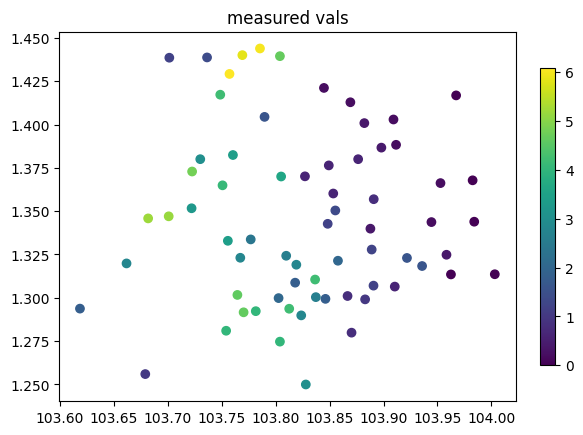

In [18]:
x = np.array(target_df_2802_loc["longitude"])
y = np.array(target_df_2802_loc["latitude"])
z = np.array(target_df_2802_loc["value"])

cax = plt.scatter(x, y, c = z)
cbar = plt.colorbar(cax, fraction = 0.03)
plt.title("measured vals")

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 4.424865837984774
Full Sill: 4.702634659634591
Range: 0.1897110270573859
Nugget: 0.2777688216498177 



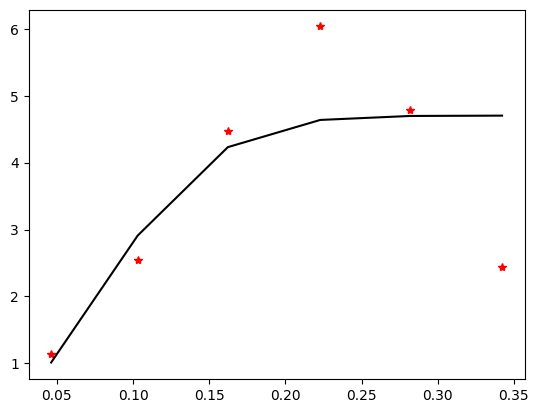

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



In [20]:
ok = pykrige.OrdinaryKriging(
    x,
    y,
    z,
    variogram_model = "gaussian",
    enable_plotting = True, # or enter as separate function: ok.display_variogram_model()
    verbose = True
)

gridx = np.arange(103.6, 104.1, 0.001, dtype = "float64")
gridy = np.arange(1.24, 1.45, 0.001, dtype = "float64")
zstar, ss = ok.execute("grid", gridx, gridy)


Text(0.5, 1.0, 'estimate')

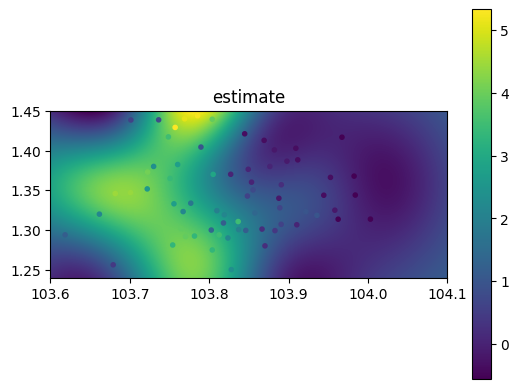

In [21]:
cax = plt.imshow(zstar, extent = (103.6, 104.1, 1.24, 1.45), origin = "lower")
plt.scatter(x, y,  c = z, marker ='.')
# plt.scatter(x, y,  c = 'k', marker ='.')
cbar = plt.colorbar(cax)
plt.title("estimate")

C:\Users\natas\AppData\Local\Temp\ipykernel_3096\3013983267.py:1: RuntimeWarning: invalid value encountered in sqrt
  cax = plt.imshow(np.sqrt(ss), extent = (103.6, 104.1, 1.24, 1.45), origin = "lower", vmin = 0)


Text(0.5, 1.0, 'standard deviation')

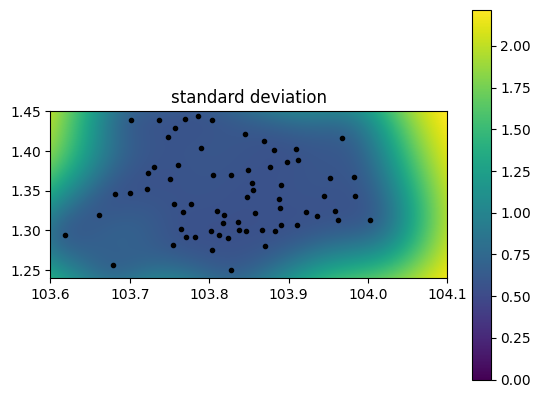

In [22]:
cax = plt.imshow(np.sqrt(ss), extent = (103.6, 104.1, 1.24, 1.45), origin = "lower", vmin = 0)
plt.scatter(x, y,  c ='k', marker ='.')
cbar = plt.colorbar(cax)
plt.title("standard deviation")

In [23]:
ok.variogram_model_parameters #sill, range, nugget

array([4.42486584, 0.18971103, 0.27776882])

using pykrige, folium heatmap

In [24]:
x = np.array(target_df_2802_loc["longitude"])
y = np.array(target_df_2802_loc["latitude"])
z = np.array(target_df_2802_loc["value"])

Plotting Enabled

Adjusting data for anisotropy...
Initializing variogram model...
Coordinates type: 'euclidean' 

Using 'gaussian' Variogram Model
Partial Sill: 4.424865837984774
Full Sill: 4.702634659634591
Range: 0.1897110270573859
Nugget: 0.2777688216498177 



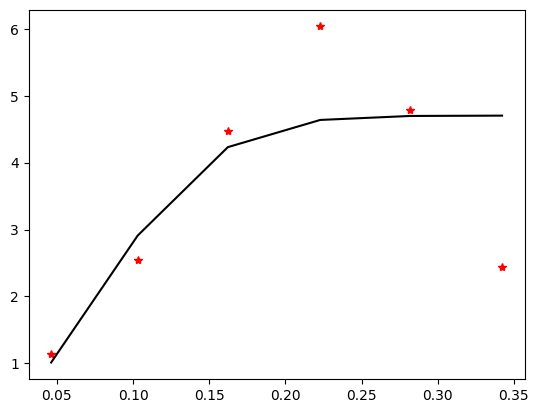

Calculating statistics on variogram model fit...
Executing Ordinary Kriging...



In [25]:
ordinary_kriging = pykrige.OrdinaryKriging(
    x,
    y,
    z,
    weight = False,
    variogram_model = "gaussian",
    enable_plotting = True,
    verbose = True
)

gridx = np.arange(103.6, 104.1, 0.01, dtype = "float64")
gridy = np.arange(1.24, 1.45, 0.01, dtype = "float64")
zstar, ss = ordinary_kriging.execute("grid", gridx, gridy)

In [27]:
interpolated_df = pd.DataFrame(data = zstar, index = gridy, columns = gridx)
interpolated_df.reset_index(names = ["lat"], inplace = True)

interpolated_df

,lat,103.6,103.61,103.62,103.63000000000001,103.64000000000001,103.65000000000002,103.66000000000003,103.67000000000003,103.68000000000004,...,104.0000000000002,104.0100000000002,104.02000000000021,104.03000000000021,104.04000000000022,104.05000000000022,104.06000000000023,104.07000000000023,104.08000000000024,104.09000000000024
0,1.24,0.179704,0.062418,-0.015790,-0.043139,-0.009501,0.092609,0.267167,0.513987,0.828336,...,0.361181,0.453815,0.540197,0.621641,0.699573,0.775098,0.848759,0.920487,0.989700,1.055484
1,1.25,0.318813,0.224403,0.169355,0.164314,0.218136,0.336998,0.523672,0.777004,1.091662,...,0.303465,0.382173,0.458395,0.533633,0.609213,0.685888,0.763651,0.841768,0.918941,0.993561
2,1.26,0.514962,0.450395,0.424481,0.446241,0.522794,0.658615,0.854982,1.109634,1.416661,...,0.250991,0.312001,0.375137,0.442077,0.513972,0.591107,0.672800,0.757512,0.843105,0.927170
3,1.27,0.763797,0.735219,0.743573,0.795824,0.896944,1.049374,1.252667,1.503352,1.794994,...,0.202168,0.242547,0.290369,0.347464,0.414738,0.491909,0.577502,0.669058,0.763498,0.857523
4,1.28,1.056386,1.068509,1.114891,1.200087,1.326625,1.494669,1.701906,1.943614,2.212911,...,0.155154,0.173104,0.204299,0.250699,0.312908,0.389995,0.479601,0.578266,0.681895,0.786245
5,1.29,1.379308,1.434839,1.521116,1.640079,1.791642,1.973593,2.181715,2.410079,2.651459,...,0.108228,0.103287,0.117601,0.153246,0.210477,0.287662,0.381507,0.487508,0.600523,0.715347
6,1.30,1.715225,1.814372,1.940100,2.091687,2.266441,2.459834,2.665845,2.877465,3.087263,...,0.060166,0.033296,0.031587,0.057213,0.110063,0.187788,0.286153,0.399613,0.521994,0.647156
7,1.31,2.043927,2.184066,2.346206,2.527103,2.721661,2.923269,3.124356,3.317057,3.493901,...,0.010563,-0.035887,-0.051708,-0.034637,0.014862,0.093747,0.196885,0.317746,0.449188,0.584202
8,1.32,2.343797,2.519352,2.712179,2.916856,3.126275,3.332165,3.525801,3.698786,3.843810,...,-0.039954,-0.102420,-0.129546,-0.118976,-0.071492,0.009241,0.117283,0.245229,0.385083,0.529075
9,1.33,2.593578,2.796148,3.011398,3.232248,3.450163,3.655807,3.839833,3.993730,4.110573,...,-0.089667,-0.163651,-0.198620,-0.192109,-0.145159,-0.061945,0.050925,0.185321,0.332553,0.484241


In [28]:
melted_predictions = pd.melt(interpolated_df, id_vars = "lat", var_name  = "long", value_name = "rain")
melted_predictions = melted_predictions.clip(lower = 0) # convert value of rows with negative rain to 0
melted_predictions

,lat,long,rain
0,1.24,103.6,0.179704
1,1.25,103.6,0.318813
2,1.26,103.6,0.514962
3,1.27,103.6,0.763797
4,1.28,103.6,1.056386
...,...,...,...
1045,1.40,104.09,0.565018
1046,1.41,104.09,0.628034
1047,1.42,104.09,0.698091
1048,1.43,104.09,0.772415


## kriging at a particular location

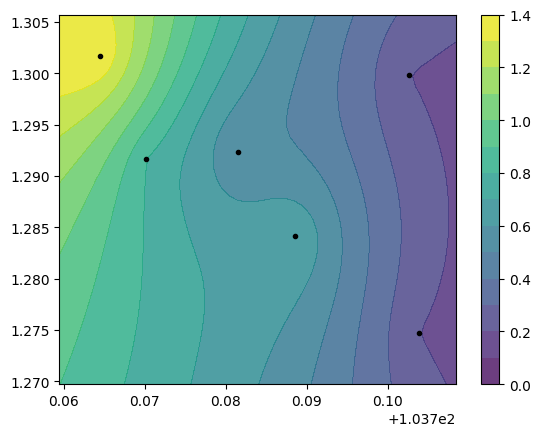

In [1]:
import pandas as pd
import datetime
import folium
import matplotlib.pyplot as plt
import numpy as np
import pykrige
import geojsoncontour
from geojson import Point, Feature, FeatureCollection, dump

station_data = pd.read_csv("station_data.csv", index_col = 0, dtype = {"device_id":"string", "name":"string", "latitude":"float64", "longitude":"float64"})

sample_data = pd.DataFrame({"station" : ["S71", "S92", "S203", "S230", "S223", "S226"],
                           "value" : [0.5, 0.7, 0.8, 1.4, 0.2, 0.2]})

def plot_kriging(predicted_data, representation):
    """
    input: 
        prediected data: dataframe containing the stations and their rainfall values (mm) at a given time
        representation: "dot"/"box"/"contour"
    """
    data = predicted_data.merge(station_data, left_on="station", right_on="device_id")
    x = np.array(data["longitude"])
    y = np.array(data["latitude"])
    z = np.array(data["value"])

    # cax = plt.scatter(x, y, c = z)
    # cbar = plt.colorbar(cax, fraction = 0.03)
    # plt.title("measured vals")

    ordinary_kriging = pykrige.OrdinaryKriging(x, y, z)

    lower_lat = data["latitude"].min()
    upper_lat = data["latitude"].max()
    lower_long = data["longitude"].min()
    upper_long = data["longitude"].max()

    sg_gridx = np.arange(lower_long-0.005, upper_long+0.005, 0.001, dtype = "float64")
    sg_gridy = np.arange(lower_lat-0.005, upper_lat+0.005, 0.001, dtype = "float64")
    zstar, ss = ordinary_kriging.execute("grid", sg_gridx, sg_gridy)

    if representation == "dot":
        interpolated_df = pd.DataFrame(data = zstar, index = sg_gridy, columns = sg_gridx)
        interpolated_df.reset_index(names = ["lat"], inplace = True)
        melted_predictions = pd.melt(interpolated_df, id_vars = "lat", var_name  = "long", value_name = "kriging_val")
        melted_predictions = melted_predictions.clip(lower = 0) # convert value of rows with negative rain to 0
        melted_predictions["approx_val"] = round(melted_predictions["kriging_val"]/ 0.05) * 0.05
        dots = plt.scatter(melted_predictions["long"], melted_predictions["lat"],  c = melted_predictions["approx_val"], marker ='.')
        cbar = plt.colorbar(dots)
        plt.scatter(x, y,  c = 'k', marker ='.')
    elif representation == "box":
        box = plt.imshow(zstar, extent = (lower_long, upper_long, lower_lat, upper_lat), origin = "lower")
        cbar = plt.colorbar(box)
        plt.scatter(x, y,  c = 'k', marker ='.')
    elif representation == "contour":
        most_rain = np.amax(zstar)
        contour = plt.contourf(sg_gridx, sg_gridy, zstar, levels = np.arange(0, most_rain+0.1, 0.1), alpha = 0.8)
        cbar = plt.colorbar(contour)
        plt.scatter(x, y,  c = 'k', marker ='.')
    
    mapf = folium.Map(location = [1.352083, 103.819839], zoom_start = 11) 

    geojson_obj = geojsoncontour.contourf_to_geojson(
        contourf=contour,
        stroke_width=1,
        fill_opacity=6)

    folium.GeoJson(
        geojson_obj,
        style_function=lambda x: {
            'color':     x['properties']['stroke'],
            'weight':    x['properties']['stroke-width'],
            'fillColor': x['properties']['fill'],
            'opacity':   1,
        }).add_to(mapf)

    mapf
    # with open('myfile.geojson', 'w') as f:
    #     dump(geojson_obj, f)

    return mapf


plot_kriging(sample_data, "contour")

## kriging at entire region

In [13]:
import pandas as pd
import folium
import numpy as np
import pykrige
import matplotlib.pyplot as plt
import geojsoncontour

In [7]:
rain_data = pd.read_csv("rain_data_full.csv",  index_col = 0)
target_date = "2023-02-28" # YYYY-MM-DD
rain_2802 = rain_data[rain_data["date"] == target_date].reset_index(drop = True)
station_data = pd.read_csv("station_data.csv", index_col = 0, dtype = {"device_id":"string", "name":"string", "latitude":"float64", "longitude":"float64"})

In [4]:
rain_2802

,date,time,station,value
0,2023-02-28,00:05:00,S77,0.0
1,2023-02-28,00:10:00,S77,0.0
2,2023-02-28,00:15:00,S77,0.0
3,2023-02-28,00:20:00,S77,0.0
4,2023-02-28,00:25:00,S77,0.0
...,...,...,...,...
23242,2023-02-28,23:35:00,S105,NaN
23243,2023-02-28,23:40:00,S105,NaN
23244,2023-02-28,23:45:00,S105,NaN
23245,2023-02-28,23:50:00,S105,NaN


In [21]:
def plot_kriging_at_time(predicted_data, time, representation):
    """
    input: 
        predicted data: dataframe containing the stations and their rainfall values (mm) at a specified time
            note: in this eg, the data will be from a particular day and not the values predicted by the model
        time: the time at which to interpolate the rain values
        representation: "dot"/"box"/"contour"
    """

    predicted_data = predicted_data[predicted_data["time"] == time].reset_index(drop = True)
    data_with_nulls = predicted_data.merge(station_data, left_on="station", right_on="device_id")

    data = data_with_nulls[data_with_nulls["value"].notna()]


    x = np.array(data["longitude"])
    y = np.array(data["latitude"])
    z = np.array(data["value"])
    
    ordinary_kriging = pykrige.OrdinaryKriging(x, y, z)

    lower_lat = data["latitude"].min()
    upper_lat = data["latitude"].max()
    lower_long = data["longitude"].min()
    upper_long = data["longitude"].max()


    sg_gridx = np.arange(lower_long-0.01, upper_long+0.01, 0.001, dtype = "float64")
    sg_gridy = np.arange(lower_lat-0.01, upper_lat+0.01, 0.001, dtype = "float64")
    zstar, ss = ordinary_kriging.execute("grid", sg_gridx, sg_gridy)

    zstar_clipped = zstar.clip(0) # replace negative values with 0 

    if representation == "dot":
        interpolated_df = pd.DataFrame(data = zstar_clipped, index = sg_gridy, columns = sg_gridx)
        interpolated_df.reset_index(names = ["lat"], inplace = True)
        melted_predictions = pd.melt(interpolated_df, id_vars = "lat", var_name  = "long", value_name = "kriging_val")
        melted_predictions = melted_predictions.clip(lower = 0) # convert value of rows with negative rain to 0
        melted_predictions["approx_val"] = round(melted_predictions["kriging_val"]/ 0.05) * 0.05
        dots = plt.scatter(melted_predictions["long"], melted_predictions["lat"],  c = melted_predictions["approx_val"], marker ='.')
        cbar = plt.colorbar(dots)
        plt.scatter(x, y,  c = 'k', marker ='.')
    elif representation == "box":
        box = plt.imshow(zstar_clipped, extent = (lower_long, upper_long, lower_lat, upper_lat), origin = "lower")
        cbar = plt.colorbar(box)
        plt.scatter(x, y,  c = 'k', marker ='.')
    elif representation == "contour":
        most_rain = np.amax(zstar_clipped)
        contour = plt.contourf(sg_gridx, sg_gridy, zstar_clipped, levels = np.arange(0, most_rain+0.1, 0.1), alpha = 0.8)
        cbar = plt.colorbar(contour)
        plt.scatter(x, y,  c = 'k', marker ='.')
    
    mapf = folium.Map(location = [1.352083, 103.819839], zoom_start = 11) 


    geojson_obj = geojsoncontour.contourf_to_geojson(
        contourf=contour,
        stroke_width=1,
        fill_opacity=6)
    
    folium.GeoJson(
        geojson_obj,
        style_function=lambda x: {
            'color':     x['properties']['stroke'],
            'weight':    x['properties']['stroke-width'],
            'fillColor': x['properties']['fill'],
            'opacity':   1,
        }).add_to(mapf)

    mapf

    return mapf




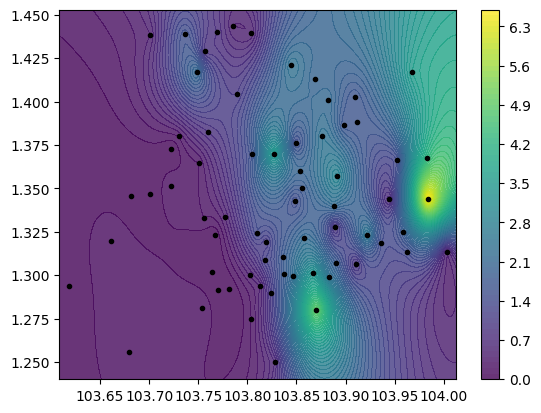

In [22]:
plot_kriging_at_time(rain_2802, "18:00:00", "contour")

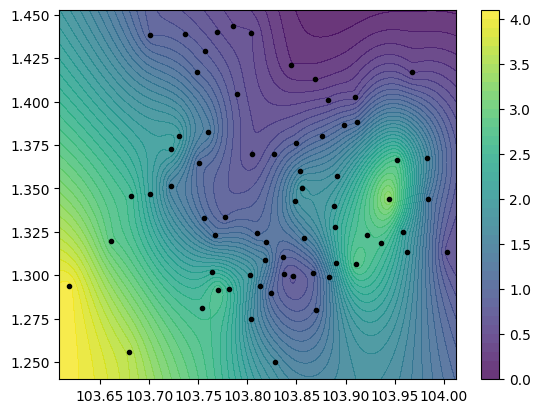

In [23]:
plot_kriging_at_time(rain_2802, "22:30:00", "contour")